## EDA with Python and applying Logistic Regression

For this we will be working with Titanic Dataset From Kaggle. This is a very famous data set and very often learners first step in Machine Learning.

We will be trying to predict a classification survival or deceased. Let's begin our understanding of implementing Logistics Regression in Python for classification.

We'll use a semi cleaned version of Titanic dataset .If you use the dataset hosted directly on kaggle. you may need to do some addntl cleaning.


In [2]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
## The Data

train = pd.read_csv('TitanicEDA.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
## Exploritory Data analysis
#   We will start by checking out missing data

train.isnull()   # if value is blank or NaN it will show as True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot: >

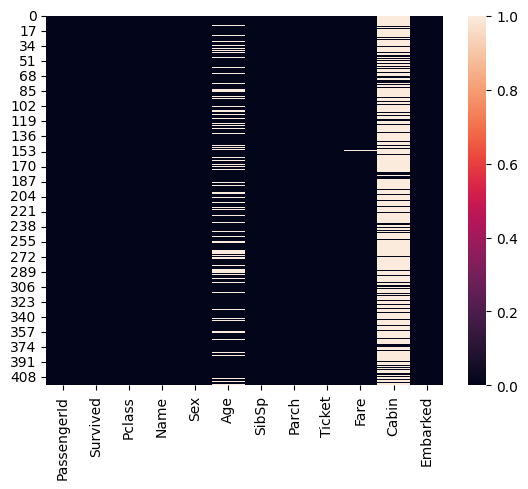

In [10]:
# From above we are unable to determine correctly which feature has most missing value so lets use visualization.

sns.heatmap(train.isnull())

<AxesSubplot: >

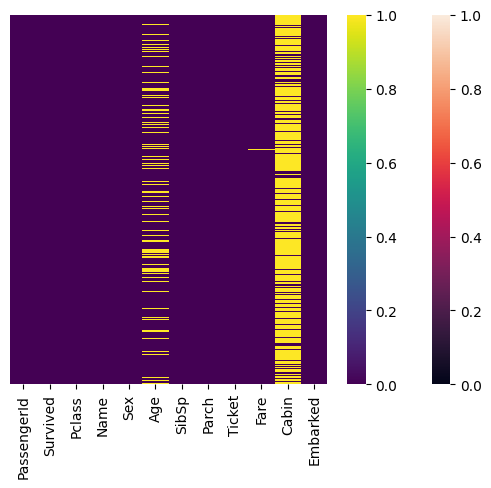

In [12]:
# I just want to know which column has null values lets remove the ylables

sns.heatmap(train.isnull(),yticklabels=False)                   #yticklables removes the y axis label
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')    #cmap gives the color